# Cvičení

Uvažuj, že provádíš analýzu stavu zásob v kamenném obchodě. Obchod je otevřený každý všední den, zásoby jsou přivezeny vždy první pracovní den v měsíci. Pro zjednodušení máme záznamy pouze o třech produktech.

In [2]:
import pandas

df = pandas.read_csv("inventory.csv")
df = df.sort_values(["product_code", "date"])
df["quantity_cumsum"] = df.groupby("product_code")["quantity"].cumsum()
df.head()


,date,product_code,quantity,quantity_cumsum
2,2022-01-03,A35-AC,82,82
3,2022-01-03,A35-AC,-5,77
7,2022-01-04,A35-AC,-7,70
10,2022-01-05,A35-AC,-2,68
13,2022-01-06,A35-AC,-7,61


1. Vytvoř graf, který zobrazuje průběh stavu zásoby jednoho z produktů.


/var/folders/nm/pl3dt5cd1vn8kph2g84mg2rc0000gn/T/ipykernel_36657/2773420864.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['date'] = pandas.to_datetime(df_product['date'])


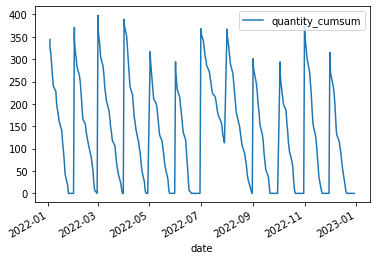

In [3]:
import matplotlib.pyplot as plt

df_product = df[df["product_code"] == "DBR-56"]

# Convert date column to datetime format
df_product['date'] = pandas.to_datetime(df_product['date'])

# Set the date column as the index
df_product.set_index('date', inplace=True)

df_product["quantity_cumsum"].plot(legend=True)

plt.show()

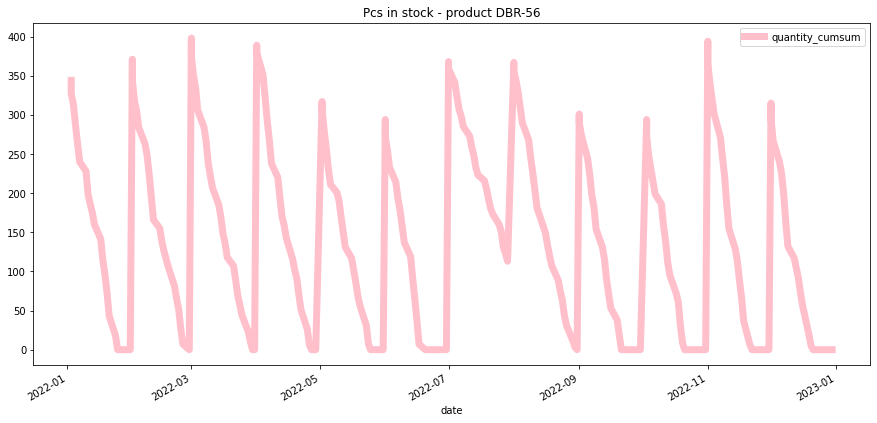

In [4]:
## Neco navic...

from matplotlib.pyplot import figure
figure(figsize=(15, 7))

df_product["quantity_cumsum"].plot(legend=True, 
                                    color="pink",
                                    linewidth=7.0,
                                    title="Pcs in stock - product DBR-56",
                                    )
plt.show()

2.  Dále zkus vytvořit graf průběhu stavu zásob všech tří uváděných produktů. Je z grafu vidět, kterého produktu je největší nedostatek? A kterého produktu má obchod naopak největší zásobu?

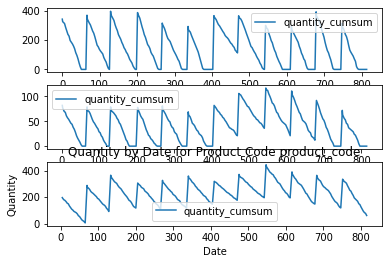

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

df[df["product_code"] == "DBR-56"].plot(ax=ax1, y="quantity_cumsum")
df[df["product_code"] == "A35-AC"].plot(ax=ax2, y="quantity_cumsum")
df[df["product_code"] == "DTC-23"].plot(ax=ax3, y="quantity_cumsum")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Quantity by Date for Product Code {}".format("product_code"))

plt.show()


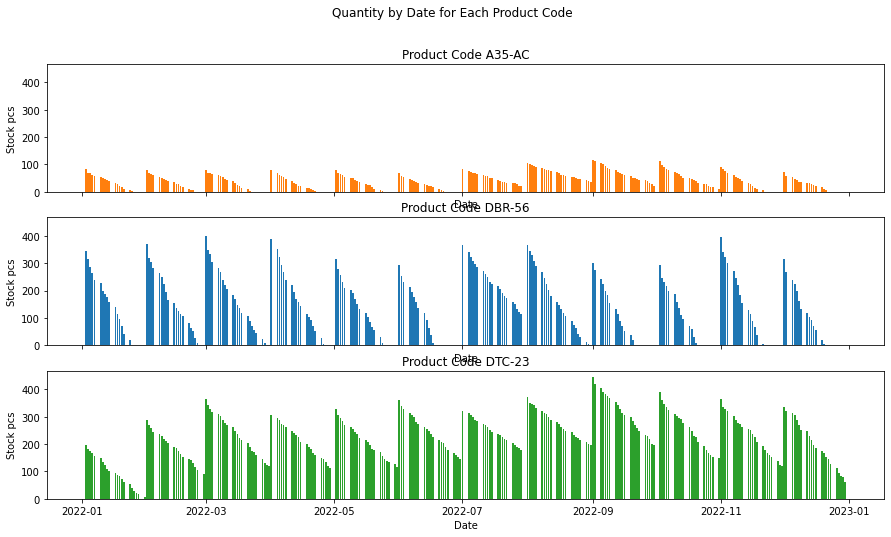

In [6]:
## Neco navic...
df['date'] = pandas.to_datetime(df['date'])

# Create subplots for each product code
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 8), sharex=True, sharey=True)

# Set colors for each product
colors = {'DBR-56': 'tab:blue', 'A35-AC': 'tab:orange', 'DTC-23': 'tab:green'}
# Loop through each product and plot its data
for i, product_code in enumerate(df['product_code'].unique()):
    df_product = df[df['product_code'] == product_code]
    # axs[i].bar(df_product['date'], df_product['quantity'], color=colors[product_code], label='Quantity')
    axs[i].bar(df_product['date'], df_product['quantity_cumsum'], color=colors[product_code], label='Cumulative Sum')
    axs[i].set_title('Product Code {}'.format(product_code))
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Stock pcs')
    # axs[i].legend()

# Add a title for the entire figure
fig.suptitle('Quantity by Date for Each Product Code')

# Show the chart
plt.show()